# 贝叶斯分类器（iris数据集）

In [3]:
# Load libraries
import pandas
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection  # 模型比较和选择包
from sklearn.naive_bayes import GaussianNB

In [6]:

class Bayes_Test():
 
    # 读取样本 数据集
    def load_dataset(self):
        colume_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
        dataset = pandas.read_table('data/iris.dat',sep='[\s]+',header=None,names=colume_names,engine='python')
        return dataset
 
    # 提取样本特征集和类别集 划分训练/测试集
    def split_out_dataset(self, dataset):
        array = dataset.values  # 将数据库转换成数组形式
        X = array[:, 0:4].astype(float)  # 取特征数值列
        Y = array[:, 4]  # 取类别列
        validation_size = 0.20  # 验证集规模
        seed = 7
        # 分割数据集 测试/验证
        X_train, X_validation, Y_train, Y_validation = \
            model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
        return X_train, X_validation, Y_train, Y_validation
 
    """第一步：划分样本集"""
 
    # 提取样本 特征
    def split_out_attributes(self, X, Y):
        # 提取 每个类别的不同特征
        # c1 第一类的特征数组
        c1_1 = c1_2 = c1_3 = c1_4 = []
        c2_1 = c2_2 = c2_3 = c2_4 = []
        c3_1 = c3_2 = c3_3 = c3_4 = []
        for i in range(len(Y)):
            if (Y[i] == 'Iris-setosa'):
                c1_1.append(X[i, 0])
                c1_2.append(X[i, 1])
                c1_3.append(X[i, 2])
                c1_4.append(X[i, 3])
            elif (Y[i] == 'Iris-versicolor'):
                # c2 第二类的特征数组
                c2_1.append(X[i, 0])
                c2_2.append(X[i, 1])
                c2_3.append(X[i, 2])
                c2_4.append(X[i, 3])
            elif (Y[i] == 'Iris-virginica'):
                # c3 第三类的特征数组
                c3_1.append(X[i, 0])
                c3_2.append(X[i, 1])
                c3_3.append(X[i, 2])
                c3_4.append(X[i, 3])
            else:
                pass
 
        return [c1_1, c1_2, c1_3, c1_4,
                c2_1, c2_2, c2_3, c2_4,
                c3_1, c3_2, c3_3, c3_4]
 
    """因为符合多变量正态分布，所以需要(μ，∑)两个样本参数"""
    """第二步：计算样本期望μ和样本方差s"""
 
    # 计算样本期望
    def cal_mean(self, attributes):
        c1_1, c1_2, c1_3, c1_4, c2_1, c2_2, c2_3, c2_4, c3_1, c3_2, c3_3, c3_4 = attributes
 
        # 第一类的期望值μ
        e_c1_1 = np.mean(c1_1)
        e_c1_2 = np.mean(c1_2)
        e_c1_3 = np.mean(c1_3)
        e_c1_4 = np.mean(c1_4)
        # 第二类的期望值μ
        e_c2_1 = np.mean(c2_1)
        e_c2_2 = np.mean(c2_2)
        e_c2_3 = np.mean(c2_3)
        e_c2_4 = np.mean(c2_4)
        # 第三类的期望值μ
        e_c3_1 = np.mean(c3_1)
        e_c3_2 = np.mean(c3_2)
        e_c3_3 = np.mean(c3_3)
        e_c3_4 = np.mean(c3_4)
 
        return [e_c1_1, e_c1_2, e_c1_3, e_c1_4,
                e_c2_1, e_c2_2, e_c2_3, e_c2_4,
                e_c3_1, e_c3_2, e_c3_3, e_c3_4]
 
    # 计算样本方差
    def cal_var(self, attributes):
        c1_1, c1_2, c1_3, c1_4, c2_1, c2_2, c2_3, c2_4, c3_1, c3_2, c3_3, c3_4 = attributes
 
        # 第一类的方差var
        var_c1_1 = np.var(c1_1)
        var_c1_2 = np.var(c1_2)
        var_c1_3 = np.var(c1_3)
        var_c1_4 = np.var(c1_4)
        # 第二类的方差s
        var_c2_1 = np.var(c2_1)
        var_c2_2 = np.var(c2_2)
        var_c2_3 = np.var(c2_3)
        var_c2_4 = np.var(c2_4)
        # 第三类的方差s
        var_c3_1 = np.var(c3_1)
        var_c3_2 = np.var(c3_2)
        var_c3_3 = np.var(c3_3)
        var_c3_4 = np.var(c3_4)
 
        return [var_c1_1, var_c1_2, var_c1_3, var_c1_4,
                var_c2_1, var_c2_2, var_c2_3, var_c2_4,
                var_c3_1, var_c3_2, var_c3_3, var_c3_4]
 
    # 计算先验概率P(Y=ck)
    def cal_prior_probability(self, Y):
        a = b = c = 0
 
        for i in Y:
            if (i == 'Iris-setosa'):
                a += 1
            elif (i == 'Iris-versicolor'):
                b += 1
            elif (i == 'Iris-virginica'):
                c += 1
            else:
                pass
 
        pa = a / len(Y)
        pb = b / len(Y)
        pc = c / len(Y)
        return pa, pb, pc
 
    # 计算后验概率P(Y=ck|X)=P(X|Y=ck)*P(Y=ck)/∑
    def cal_posteriori_probability(self, X, Y, p, means, vars):
        pa, pb, pc = p
        e_c1_1, e_c1_2, e_c1_3, e_c1_4, e_c2_1, e_c2_2, e_c2_3, e_c2_4, e_c3_1, e_c3_2, e_c3_3, e_c3_4 = means
        var_c1_1, var_c1_2, var_c1_3, var_c1_4, var_c2_1, var_c2_2, var_c2_3, var_c2_4, var_c3_1, var_c3_2, var_c3_3, var_c3_4 = vars
 
        print('p:', p)
        print('means:', means)
        print('vars:', vars)
 
        # 分解四维输入向量X=[X1，X2，X3，X4]为4个一维正态分布函数
        X1 = X[:, 0]
        X2 = X[:, 1]
        X3 = X[:, 2]
        X4 = X[:, 3]
 
        # 分类正确数/分类错误数=>计算正确率
        true_test = 0
        false_test = 0
 
        # 遍历训练整个输入空间，计算后验概率并判决
        for i in range(len(X1)):
            # 计算后验概率=P(X|Y=C1)P(Y=C1)
            P_1 = stats.norm.pdf(X1[i], e_c1_1, var_c1_1) * stats.norm.pdf(X2[i], e_c1_2, var_c1_2) * stats.norm.pdf(
                X3[i], e_c1_3,
                var_c1_3) * stats.norm.pdf(
                X4[i], e_c1_4, var_c1_4) * pa
            # 计算后验概率=P(X|Y=C2)P(Y=C2)
            P_2 = stats.norm.pdf(X1[i], e_c2_1, var_c2_1) * stats.norm.pdf(X2[i], e_c2_2, var_c2_2) * stats.norm.pdf(
                X3[i], e_c2_3,
                var_c2_3) * stats.norm.pdf(
                X4[i], e_c2_4, var_c2_4) * pb
            # 计算后验概率=P(X|Y=C3)P(Y=C3)
            P_3 = stats.norm.pdf(X1[i], e_c3_1, var_c3_1) * stats.norm.pdf(X2[i], e_c3_2, var_c3_2) * stats.norm.pdf(
                X3[i], e_c3_3,
                var_c3_3) * stats.norm.pdf(
                X4[i], e_c3_4, var_c3_4) * pc
 
            # 计算判别函数，选取概率最大的类
            max_P = max(P_1, P_2, P_3)
            # 输出分类结果，并检测正确率
            if (max_P == P_1):
                if (Y[i] == 'Iris-setosa'):
                    print('分为第一类，正确')
                    true_test += 1
                else:
                    print('分为第一类，错误')
                    false_test += 1
            elif (max_P == P_2):
                if (Y[i] == 'Iris-versicolor'):
                    print('分为第二类，正确')
                    true_test += 1
                else:
                    print('分为第二类，错误')
                    false_test += 1
            elif (max_P == P_3):
                if (Y[i] == 'Iris-virginica'):
                    print('分为第三类，正确')
                    true_test += 1
                else:
                    print('分为第三类，错误')
                    false_test += 1
            else:
                print('未分类')
                false_test += 1
        # 打印分类正确率
        print('训练正确率为:', (true_test / (true_test + false_test)))
 
    # 模板方法对照
    def cal_dataset(self, X_train, Y_train):
        # Test options and evaluation metric
        seed = 7
        scoring = 'accuracy'
        # Check Algorithms
        model = GaussianNB()
        name = 'bayes classifier'
        # 建立K折交叉验证 10倍
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        # cross_val_score() 对数据集进行指定次数的交叉验证并为每次验证效果评测
        cv_results = \
            model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results = cv_results
        msg = "%s: %f (%f)" % (name + '精度', cv_results.mean(), cv_results.std())
        print(msg)
 
        # Show Algorithms
        dataresult = pandas.DataFrame(results)
        dataresult.plot(title='Bayes accuracy analysis', kind='density', subplots=True, layout=(1, 1), sharex=False,
                        sharey=False)
        dataresult.hist()
        plt.show()

In [7]:
bayes = Bayes_Test()
dataset = bayes.load_dataset()
# 划分训练集 测试集
X_train, X_validation, Y_train, Y_validation = bayes.split_out_dataset(dataset)
print('得到的X_train', X_train)
print('得到的Y_train', Y_train)

得到的X_train [[62. 28. 48. 18.]
 [57. 26. 35. 10.]
 [46. 36. 10.  2.]
 [69. 31. 54. 21.]
 [64. 29. 43. 13.]
 [48. 30. 14.  3.]
 [55. 35. 13.  2.]
 [54. 39. 17.  4.]
 [51. 35. 14.  3.]
 [71. 30. 59. 21.]
 [67. 33. 57. 21.]
 [68. 28. 48. 14.]
 [64. 28. 56. 22.]
 [65. 30. 55. 18.]
 [57. 30. 42. 12.]
 [50. 33. 14.  2.]
 [67. 31. 44. 14.]
 [60. 22. 40. 10.]
 [64. 27. 53. 19.]
 [47. 32. 16.  2.]
 [46. 31. 15.  2.]
 [51. 34. 15.  2.]
 [77. 38. 67. 22.]
 [43. 30. 11.  1.]
 [63. 33. 60. 25.]
 [55. 24. 37. 10.]
 [50. 20. 35. 10.]
 [65. 28. 46. 15.]
 [50. 34. 16.  4.]
 [44. 29. 14.  2.]
 [50. 35. 16.  6.]
 [67. 31. 47. 15.]
 [73. 29. 63. 18.]
 [55. 26. 44. 12.]
 [52. 27. 39. 14.]
 [57. 44. 15.  4.]
 [72. 32. 60. 18.]
 [54. 34. 17.  2.]
 [58. 40. 12.  2.]
 [61. 26. 56. 14.]
 [57. 25. 50. 20.]
 [48. 30. 14.  1.]
 [65. 30. 58. 22.]
 [46. 32. 14.  2.]
 [66. 29. 46. 13.]
 [67. 30. 52. 23.]
 [61. 30. 46. 14.]
 [57. 38. 17.  3.]
 [70. 32. 47. 14.]
 [47. 32. 13.  2.]
 [65. 30. 52. 20.]
 [77. 26. 69. 23.]
 

In [8]:
# 分割属性--训练集
attributes = bayes.split_out_attributes(X_train, Y_train)
print('得到的训练集', attributes)
 
# 计算期望--训练集
means = bayes.cal_mean(attributes)
print('得到的means', means)
 
# 计算方差--训练集
vars = bayes.cal_var(attributes)
print('得到的vars', vars)

得到的训练集 [[], [], [], [], [], [], [], [], [], [], [], []]
得到的means [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
得到的vars [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p: (0.0, 0.0, 0.0)
means: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
vars: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
未分类
训练正确率为: 0.0
bayes classifier精度: 0.800000 (0.163299)


C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1741: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1742: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x, *args) & (scale > 0)
C:\Users\YMZ\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuff

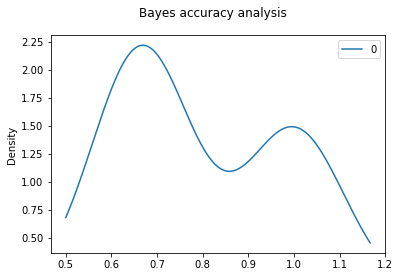

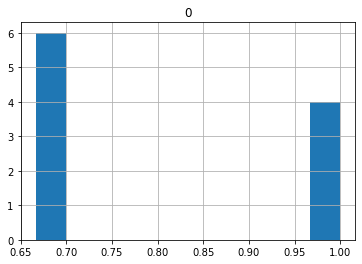

In [9]:
# 计算先验概率--训练集
prior_p = bayes.cal_prior_probability(Y_train)
# 验证分类准确性--测试集
bayes.cal_posteriori_probability(X_train, Y_train, prior_p, means, vars)
 
# 模板方法--性能对比
bayes.cal_dataset(X_validation, Y_validation)